<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB3/blob/main/6351071043_LAB3_Bai2(Trang5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. (Lập	trình)	Sử	dụng Neural	Network	để	xây	dựng	mô	hình	phân	lớp	trên
bộ	dữ	liệu	MNIST	từ	thư	viện	Keras (chia	train	– test	– validation)

Mô	tả	bộ	dữ	liệu	MNIST:	được	tạo	ra	từ	một	tập	hợp	các	ảnh	kỹ	thuật	số	của	các	chữ	số	viết	tay	từ	0	đến	9.	Gồm	70.000	ảnh	kỹ	thuật	số,	trong	đó	60.000	ảnh	được	sử	dụng	cho	train và	10.000	ảnh	được	sử	dụng	cho	test.

Mỗi	ảnh	trong	bộ	dữ	liệu	MNIST	có	kích	thước	28x28	pixel	và	là	ảnh	đen	trắng	(grayscale).	Các	pixel	được	mã	hóa	dưới	dạng	giá	trị	từ	0	đến	255,	trong	đó	0	đại	diện	cho	màu	đen	tuyệt	đối	và	255	đại	diện	cho	màu	trắng	tuyệt	đối.

Mỗi	ảnh	được	gán	một	nhãn,	tương	ứng	với	chữ	số	mà	nó	đại	diện.	Nhãn	được
biểu	diễn	dưới	dạng	số	nguyên	từ	0	đến	9.

a) Đọc	bộ	dữ	liệu	train,	test	của	MNIST	từ	Keras

Hướng	dẫn:	Từ	thư	viện	Kerast import	MNIST và	sử	dụng	hàm	load_data để	đọc	bộ	dữ	liệu và	ghi	vào	(train_images, train_labels),	(test_images,	test_labels)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
print("\nNguyễn Thành Luân - 6351071043")
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



Nguyễn Thành Luân - 6351071043
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


b) In	ra	kích	thước	của	tập	train,	test:

Hướng	dẫn:	Sử	dụng	shape


Nguyễn Thành Luân - 6351071043
Kích thước tập Train images: (60000, 28, 28)
Kích thước tập Train labels: (60000,)
Kích thước tập Test images:  (10000, 28, 28)
Kích thước tập Test labels:  (10000,)


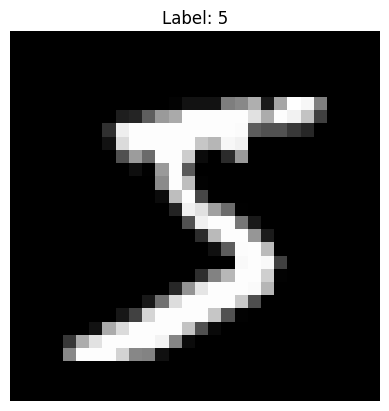

In [3]:
print("\nNguyễn Thành Luân - 6351071043")
print(f"Kích thước tập Train images: {train_images.shape}")
print(f"Kích thước tập Train labels: {train_labels.shape}")
print(f"Kích thước tập Test images:  {test_images.shape}")
print(f"Kích thước tập Test labels:  {test_labels.shape}")

plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.axis('off')
plt.show()

c) Chuẩn	hóa	các	giá	trị pixel	của	ảnh	về	đoạn	[0,1]

Hướng	dẫn:	Chia	255.0

In [4]:
print("\nNguyễn Thành Luân - 6351071043")
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Giá trị pixel sau khi chuẩn hóa (min, max):", train_images.min(), train_images.max())


Nguyễn Thành Luân - 6351071043
Giá trị pixel sau khi chuẩn hóa (min, max): 0.0 1.0


d) Chia	tập	train ban	đầu	thành	tập	train	và	tập	validaion theo	tỷ	lệ	8:2

Hướng	dẫn:	Sử	dụng train_test_split từ	 thư	viện	 sklearn	để	chia	train_images,
train_labels thành	 chia	 train_images,	 train_labels,	 validation_images,
validation_labels

In	shape	của	các	trập	train	và	validation.

In [5]:
print("\nNguyễn Thành Luân - 6351071043")
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print(f"Shape tập Train mới: {X_train.shape}")
print(f"Shape tập Validation: {X_val.shape}")


Nguyễn Thành Luân - 6351071043
Shape tập Train mới: (48000, 28, 28)
Shape tập Validation: (12000, 28, 28)


e) Xây	dựng	Neural	Network	gồm các layers:
  - Flatten	layer:	Làm	phẳng,	chuyển	đổi	dữ	liệu	 từ	định	dạng	2D	 (28x28	pixel)	thành vector	1D	(784	chiều)
  - Dense layer:	Gồm	128	neural,	sử	dụng	hàm	kích	hoạt	Relu	và	các	neural	được	kết	nối	đầy	đủ	với	các	neural	ở	lớp	trước	đó	(Fully	connected)
  - Drop	 out	layer:	ngẫu	 nhiên	 "tắt"	một	 số	 neuron	trong	 quá	 trình	 huấn	luyện,	nhằm	giảm	thiểu	hiện	tượng	overfitting.	Mỗi	neuron	sẽ	có	xác	suất	20% để	bị	tắt.
  - Dense layer:	Gồm	số	lượng	neural	là	số	class	cần	phân	lớp,	sử	dụng	hàm	kích	hoạt	Softmax	để	tính	xác	suất	của	từng	class	và	các	neural	được	kết	nối	đầy	đủ	(Fully	connected).

Hướng	dẫn:	Sử	dụng Sequential, Flatten,	Dense,	Dropout từ	thư	viện	Keras	với	TensorFlow	backend.

In [6]:
print("\nNguyễn Thành Luân - 6351071043")
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


Nguyễn Thành Luân - 6351071043


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


f) Biên	 dịch	 mô	 hình	 sử	 dụng optimizer: adam;	 loss: sparse_categorical_crossentropy;	metric: accuracy

Hướng	dẫn:	Sử	dụng	compile

In [7]:
print("\nNguyễn Thành Luân - 6351071043")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Nguyễn Thành Luân - 6351071043


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

g) Huấn	 luyện	 mô	 hình	 dựa	 trên	 tập	 train,	 đánh	 giá	 với	 tập	 validation;
epoch: 5;	batch_size:	32.

Hướng	dẫn:	Sử	dụng	fit

In [8]:
print("\nNguyễn Thành Luân - 6351071043")
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)


Nguyễn Thành Luân - 6351071043
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8441 - loss: 0.5268 - val_accuracy: 0.9538 - val_loss: 0.1595
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9503 - loss: 0.1663 - val_accuracy: 0.9615 - val_loss: 0.1279
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9632 - loss: 0.1204 - val_accuracy: 0.9650 - val_loss: 0.1128
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9712 - loss: 0.0965 - val_accuracy: 0.9722 - val_loss: 0.0908
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9746 - loss: 0.0788 - val_accuracy: 0.9752 - val_loss: 0.0800


h) Vẽ	biểu	đồ	thể	hiện	accuracy,	loss	sau	mỗi	epoch.

Hướng	dẫn:	Sử	dụng	plot	trong	matplotlib


Nguyễn Thành Luân - 6351071043


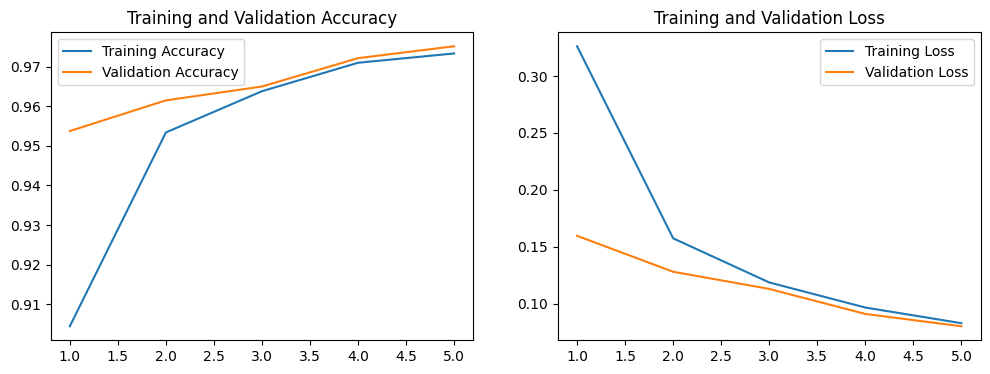

In [9]:
print("\nNguyễn Thành Luân - 6351071043")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

i) Dự	đoán	phân lớp	cho	tập	test

Hướng	dẫn:	sử	dụng	predict	để	dự	đoán	xác	suất	cho	mỗi	mẫu	và	mỗi	class.	Sử	dụng	argmax	của	thư	viện	numpy	để	chọn	ra	class	có	xác	suất	lớn	nhất	của	từng	mẫu	dữ	liệu.

In [10]:
print("\nNguyễn Thành Luân - 6351071043")
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)


Nguyễn Thành Luân - 6351071043
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


j) Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test

In [11]:
print("\nNguyễn Thành Luân - 6351071043")
test_acc = accuracy_score(test_labels, y_pred)
print(f"Độ chính xác trên tập Test (Accuracy): {test_acc:.4f}")


Nguyễn Thành Luân - 6351071043
Độ chính xác trên tập Test (Accuracy): 0.9758


k) Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của
mô	hình	trên	tập	test

In [12]:
print("\nNguyễn Thành Luân - 6351071043")
print("Báo cáo phân lớp (Classification Report):")
print(classification_report(test_labels, y_pred, digits=4))


Nguyễn Thành Luân - 6351071043
Báo cáo phân lớp (Classification Report):
              precision    recall  f1-score   support

           0     0.9768    0.9898    0.9833       980
           1     0.9894    0.9903    0.9899      1135
           2     0.9775    0.9700    0.9737      1032
           3     0.9707    0.9832    0.9769      1010
           4     0.9728    0.9837    0.9782       982
           5     0.9751    0.9641    0.9696       892
           6     0.9830    0.9666    0.9747       958
           7     0.9754    0.9660    0.9707      1028
           8     0.9691    0.9671    0.9681       974
           9     0.9666    0.9742    0.9704      1009

    accuracy                         0.9758     10000
   macro avg     0.9757    0.9755    0.9755     10000
weighted avg     0.9758    0.9758    0.9758     10000



l) Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)


Nguyễn Thành Luân - 6351071043


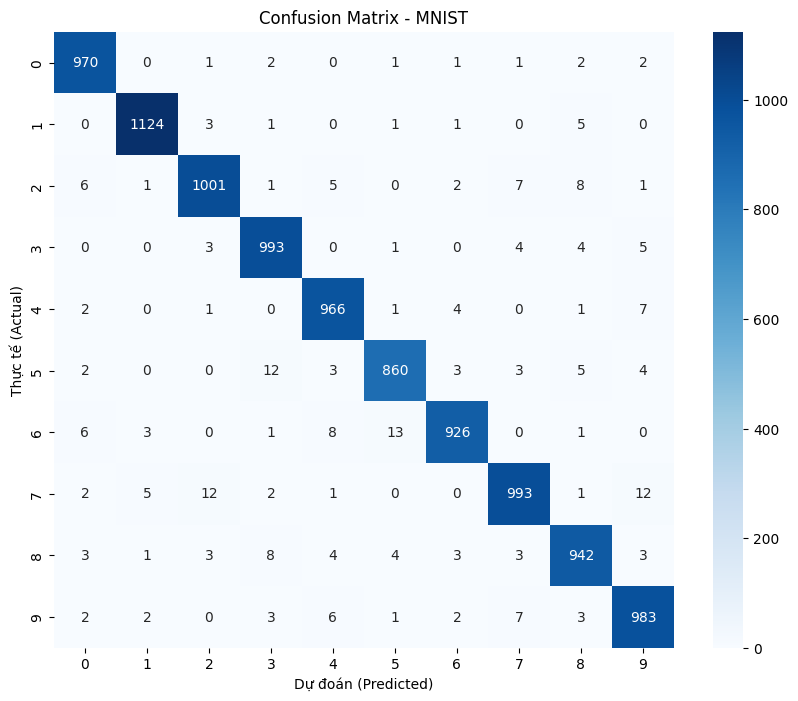

In [13]:
print("\nNguyễn Thành Luân - 6351071043")
cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MNIST')
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.show()

m)In	ra	kết	quả	phân	lớp	của	05	ảnh	đầu	tiên	trong	tập	test

Hướng	dẫn:

Chạy	image	index	trong	range(5)	để	phân	lớp	05	ảnh	đầu	tiên	trong	tập	test.
  
  Sử	dụng	expand_dims	trong	numpy	để	lấy	ảnh	từ	tập	test.
  
  Sử	dụng	predict,	argmax	để	phân	lớp.
  
  Sử	dụng	plot	trong	matplotlib	để	hiển	thị	ảnh.


Nguyễn Thành Luân - 6351071043


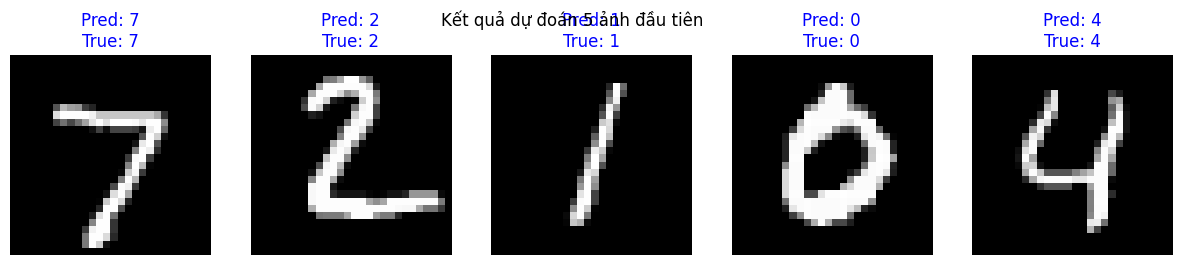

In [14]:
print("\nNguyễn Thành Luân - 6351071043")
plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')

    true_label = test_labels[i]
    pred_label = y_pred[i]

    color = 'blue' if true_label == pred_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.suptitle("Kết quả dự đoán 5 ảnh đầu tiên")
plt.show()

n) In	ra	05	kết	quả	đầu	tiên	phân	lớp	sai	so	với	nhãn	thực	tế	trong	tập	test


Nguyễn Thành Luân - 6351071043
Tổng số ảnh đoán sai: 242


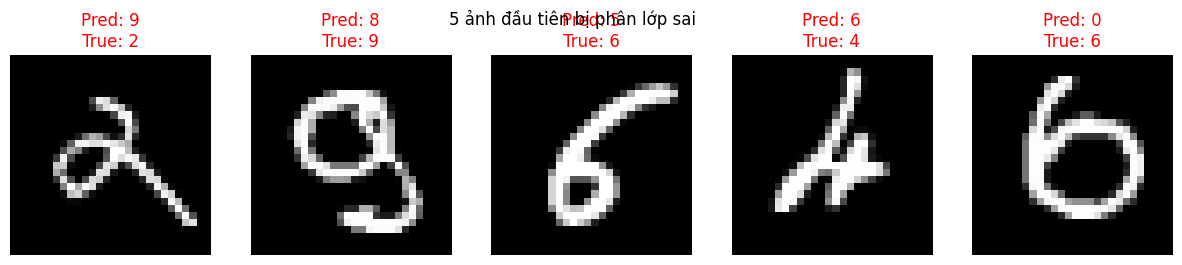

In [15]:

misclassified_indices = np.where(y_pred != test_labels)[0]
print("\nNguyễn Thành Luân - 6351071043")
print(f"Tổng số ảnh đoán sai: {len(misclassified_indices)}")

plt.figure(figsize=(15, 3))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[idx], cmap='gray')

    true_label = test_labels[idx]
    pred_label = y_pred[idx]

    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color='red')
    plt.axis('off')

plt.suptitle("5 ảnh đầu tiên bị phân lớp sai")
plt.show()